In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils
import plots
import envs
import optim
import gym

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%matplotlib inline

In [18]:
env = envs.taxi
print(env.nA, env.nS)

6 500


In [19]:
params = dict(
    num_episodes=300,
    repetitions=10,
    reduction = "mean",
    # hyperparameters
    discount_factor=1.0,
    alpha=0.1,
    epsilon=0.1,
)

smoothing_radius = 30

In [20]:
ep_lengths_q_learning, ep_returns_q_learning = optim.q_learning(env, **params)
ep_lengths_dbl_q_learning, ep_returns_dbl_q_learning = optim.double_q_learning(env, **params)

100%|██████████| 10/10 [03:42<00:00, 22.26s/it]                                                                                                       


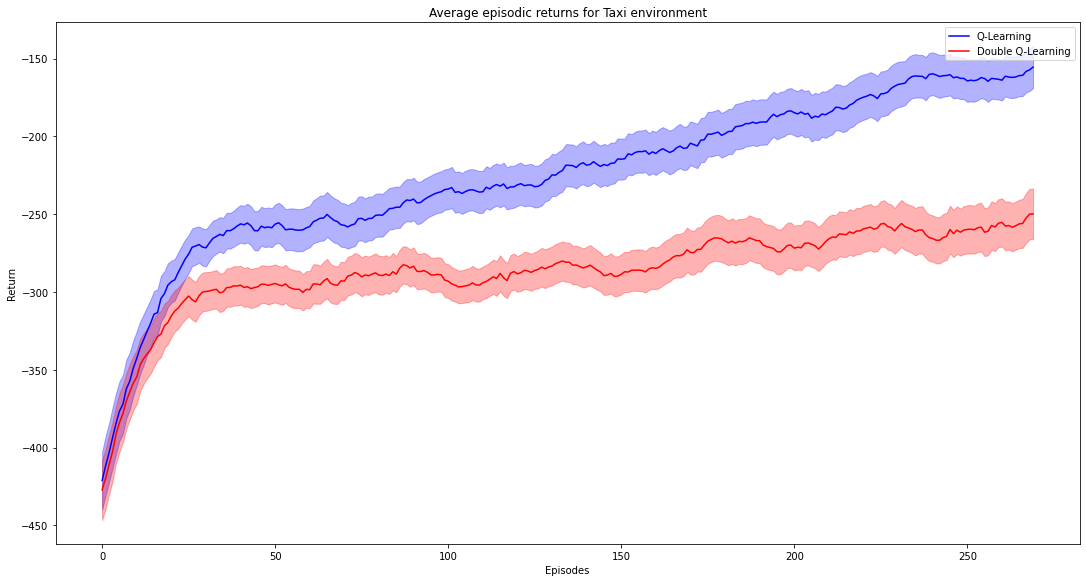

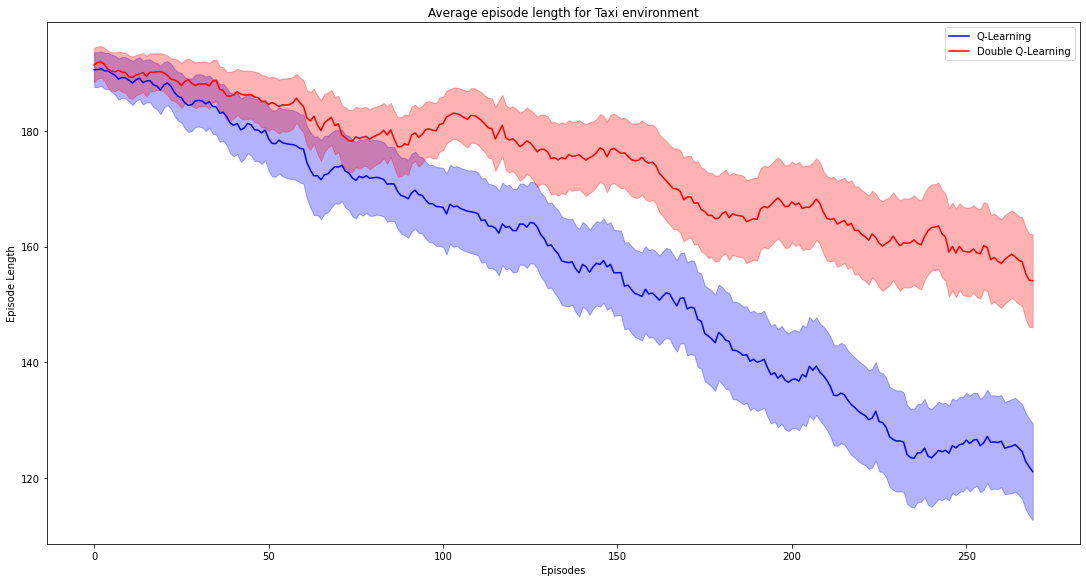

In [21]:
plots.plot_values([
        (dict(label="Q-Learning", color="blue"), ep_returns_q_learning),
        (dict(label="Double Q-Learning", color="red"), ep_returns_dbl_q_learning),
    ],
    smoothing_radius=smoothing_radius,
    title="Average episodic returns for Taxi environment",
    confidence_band_scale=0.15,
    legend=True,
    xlabel="Episodes", ylabel="Return",
    savefig="../figs/taxi_average_episodic_returns.pdf",
)
plots.plot_values([
        (dict(label="Q-Learning", color="blue"), ep_lengths_q_learning),
        (dict(label="Double Q-Learning", color="red"), ep_lengths_dbl_q_learning),
    ],
    smoothing_radius=smoothing_radius,
    title="Average episode length for Taxi environment",
    confidence_band_scale=0.15,
    legend=True,
    xlabel="Episodes", ylabel="Episode Length",
    savefig="../figs/taxi_average_episode_length.pdf"
)